In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc) 

11493376/11490434 [==============================] - 11s 1us/step
Epoch 1/3
60000/60000 [==============================] - 18s 306us/step - loss: 0.2666 - acc: 0.9216
Epoch 2/3
60000/60000 [==============================] - 15s 257us/step - loss: 0.1095 - acc: 0.9658
Epoch 3/3
10000/10000 [==============================] - 1s 109us/step
0.10261153131909669
0.9685


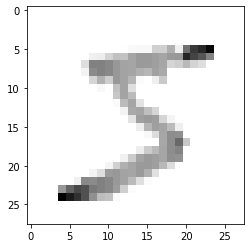

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [21]:
prediction=(model.predict([x_test]))

7


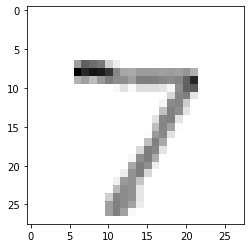

In [26]:
#print(prediction)
import numpy as np
print(np.argmax(prediction[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [34]:
#from keras.models import load_model
import h5py
#model.save('my_model.h5')
h5py.run_tests()

...........s...........................................x...........................s.....s......................................x....................................sC:\Users\praveen\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\_hl\files.py:258: H5pyDeprecationWarning: File.fid has been deprecated. Use File.id instead.
  "Use File.id instead.", H5pyDeprecationWarning)
...s......ss.ss...............................................................................ss...................ssssss.....................................................................x....x.........................x......x..................................................ssss...................s........................................
----------------------------------------------------------------------
Ran 509 tests in 13.457s

OK (skipped=22, expected failures=6)


<unittest.runner.TextTestResult run=509 errors=0 failures=0>

In [63]:
#model.save('epic_num_model.model')

In [43]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [44]:
print(model_json)

{"class_name": "Sequential", "config": [{"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform

model.save_weights('model.h5')

In [52]:
from tensorflow import keras
from keras.models import load_model
model.save('my_model.h5')

Using TensorFlow backend.


ImportError: `save_model` requires h5py.

In [56]:
tf.VERSION

'1.10.0'

In [58]:
from keras.models import model_from_json
model1= model_from_json(model_json)

In [60]:
prediction=model1.predict([x_test])

In [62]:
print(np.argmax(prediction[1]))

0


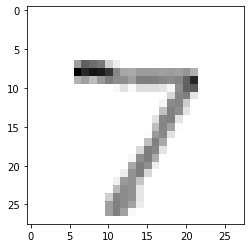

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [69]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()
print(x_test[0])